In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
data = pd.read_csv('./Howell1.csv', sep=';')

In [3]:
data.head(5)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


## Model

h_i ~ Normal(mu, sigma)

mu ~ Normal(178, 20)

sigma ~ Uniform(0, 50)

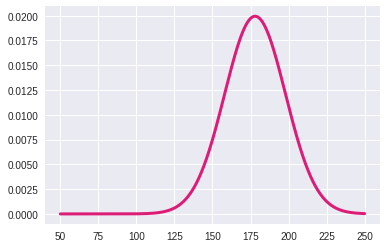

In [12]:
x = np.linspace(start=50, stop=250, num=1000)
prior_probs = stats.norm(178, 20).pdf(x)
plt.plot(x, prior_probs, color='#dd1c77', linewidth=3)
plt.show()

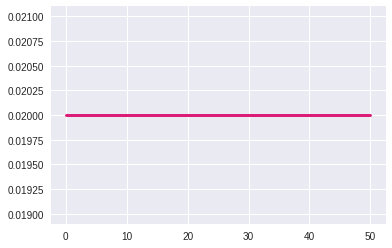

In [13]:
x = np.linspace(start=0, stop=50, num=1000)
sigma = stats.uniform(loc=0, scale=50).pdf(x)
plt.plot(x, sigma, color='#dd1c77', linewidth=3)
plt.show()

/home/upul/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/upul/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


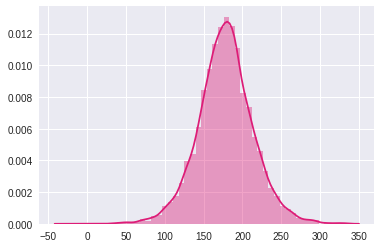

In [14]:
# lets simulating from mu

sample_mu = stats.norm(loc=178, scale=20).rvs(10000)
sample_sigma = stats.uniform(loc=0, scale=50).rvs(10000)
prior_h = stats.norm(loc=sample_mu, scale=sample_sigma).rvs()
sns.distplot(prior_h, color='#dd1c77')
plt.show()

In [15]:
# n_samples = 1000
# sample_mu = stats.norm.rvs(loc=178, scale=20, size=n_samples)
# sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=n_samples)
# prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)
# pm.kdeplot(prior_h)
# plt.xlabel('heights', fontsize=14)
# plt.yticks([]);

In [16]:
r = stats.binned_statistic(prior_h, prior_h, 'count', bins=1000)

/home/upul/anaconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


In [17]:
r.bin_edges[r.statistic.argmax()]

180.17703824181814